# **Rwanda Maize Yield Prediction - Complete Machine Learning Pipeline**

**Project Overview**

This project aims to develop a machine learning model to predict maize yield in Rwanda based on various agricultural and environmental factors. The model will help farmers, agricultural planners, and policymakers optimize crop production through data-driven insights.


CHAPTER 1: INTRODUCTION
=======================

1.1 Introduction and Background

Rwanda’s agriculture employs over 70% of the population and contributes 33% to GDP.
Maize is a staple crop, yet average yields remain low at 2 t/ha compared to global 5.5 t/ha.

1.2 Problem Statement

Smallholder farmers lack data-driven tools to optimize inputs such as NPK, pesticides and rainfall.
National planners also rely on outdated surveys, leading to inefficient resource allocation.

# **Why SmartGwiza is a solution?**

This project of SmartGwiza will help different people in the agricultural sector to make data driven decision relying on real-time data, Having this system many farmers will be able


# **Step1: Import necessary libraries**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical analysis
from scipy import stats

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


# **Step 2: Load and Explore the Dataset**

This step loads the dataset and provides an initial overview of its structure, data types, and basic statistics.

In [ ]:
# Load the dataset
df = pd.read_csv('rwanda_maize_yield.csv')

# Basic dataset exploration
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\n=== COLUMN INFORMATION ===")
print(df.columns.tolist())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== BASIC STATISTICS ===")
display(df.describe())

=== DATASET OVERVIEW ===
Dataset shape: (2200, 8)
Number of records: 2200
Number of features: 8

=== COLUMN INFORMATION ===
['district', 'rainfall_mm', 'temperature_c', 'soil_ph', 'fertilizer_used_kg_per_ha', 'pesticide_l_per_ha', 'irrigation_type', 'yield_tons_per_ha']

=== DATA TYPES ===
district                      object
rainfall_mm                  float64
temperature_c                float64
soil_ph                      float64
fertilizer_used_kg_per_ha    float64
pesticide_l_per_ha           float64
irrigation_type               object
yield_tons_per_ha            float64
dtype: object

=== FIRST 5 ROWS ===


,district,rainfall_mm,temperature_c,soil_ph,fertilizer_used_kg_per_ha,pesticide_l_per_ha,irrigation_type,yield_tons_per_ha
0,Musanze,1174.7,16.9,6.88,74.6,10.74,Irrigated,7.99
1,Musanze,1315.2,17.9,6.93,62.0,13.14,Irrigated,8.35
2,Musanze,1322.0,17.4,6.25,62.0,4.39,Irrigated,6.42
3,Musanze,1426.2,16.1,6.28,34.4,8.31,Rainfed,5.92
4,Musanze,1264.5,17.2,6.53,42.0,8.83,Irrigated,6.96



=== BASIC STATISTICS ===


,rainfall_mm,temperature_c,soil_ph,fertilizer_used_kg_per_ha,pesticide_l_per_ha,yield_tons_per_ha
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1120.477682,20.566909,5.434736,59.940182,7.540595,6.016191
std,183.009468,1.982145,0.664684,23.156354,4.338760,1.276910
min,682.700000,13.300000,4.300000,20.000000,0.000000,2.390000
25%,965.075000,19.300000,4.930000,39.500000,3.740000,5.100000
50%,1102.250000,20.600000,5.370000,60.100000,7.620000,6.070000
75%,1279.425000,22.000000,5.872500,80.250000,11.332500,6.930000
max,1628.800000,25.800000,7.000000,100.000000,15.000000,10.380000


# **Step 3: Data Quality Assessment**

Check for data quality issues including missing values, duplicates, and categorical variable distributions.

In [ ]:
print("=== DATA QUALITY CHECK ===")

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
print(missing_data)

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print("\n=== CATEGORICAL VARIABLES ===")
categorical_cols = ['district', 'irrigation_type']
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts())

print("\n=== TARGET VARIABLE DISTRIBUTION ===")
print(f"Target variable: yield_tons_per_ha")
print(f"Range: {df['yield_tons_per_ha'].min():.2f} - {df['yield_tons_per_ha'].max():.2f} tons/ha")
print(f"Mean: {df['yield_tons_per_ha'].mean():.2f} tons/ha")
print(f"Standard deviation: {df['yield_tons_per_ha'].std():.2f} tons/ha")

=== DATA QUALITY CHECK ===

Missing Values:
district                     0
rainfall_mm                  0
temperature_c                0
soil_ph                      0
fertilizer_used_kg_per_ha    0
pesticide_l_per_ha           0
irrigation_type              0
yield_tons_per_ha            0
dtype: int64

Duplicate rows: 0

=== CATEGORICAL VARIABLES ===

district:
  Unique values: 22
  Value counts:
district
Musanze       100
Rubavu        100
Nyabihu       100
Burera        100
Gasabo        100
Kicukiro      100
Nyarugenge    100
Muhanga       100
Gatsibo       100
Nyagatare     100
Rwamagana     100
Ngoma         100
Kayonza       100
Bugesera      100
Kirehe        100
Huye          100
Gisagara      100
Nyamagabe     100
Nyaruguru     100
Karongi       100
Rusizi        100
Nyamasheke    100
Name: count, dtype: int64

irrigation_type:
  Unique values: 2
  Value counts:
irrigation_type
Irrigated    1112
Rainfed      1088
Name: count, dtype: int64

=== TARGET VARIABLE DISTRIBUTION ==

# **Step 4: Exploratory Data Analysis - Visualizations**

Create comprehensive visualizations to understand data distributions, relationships, and patterns.

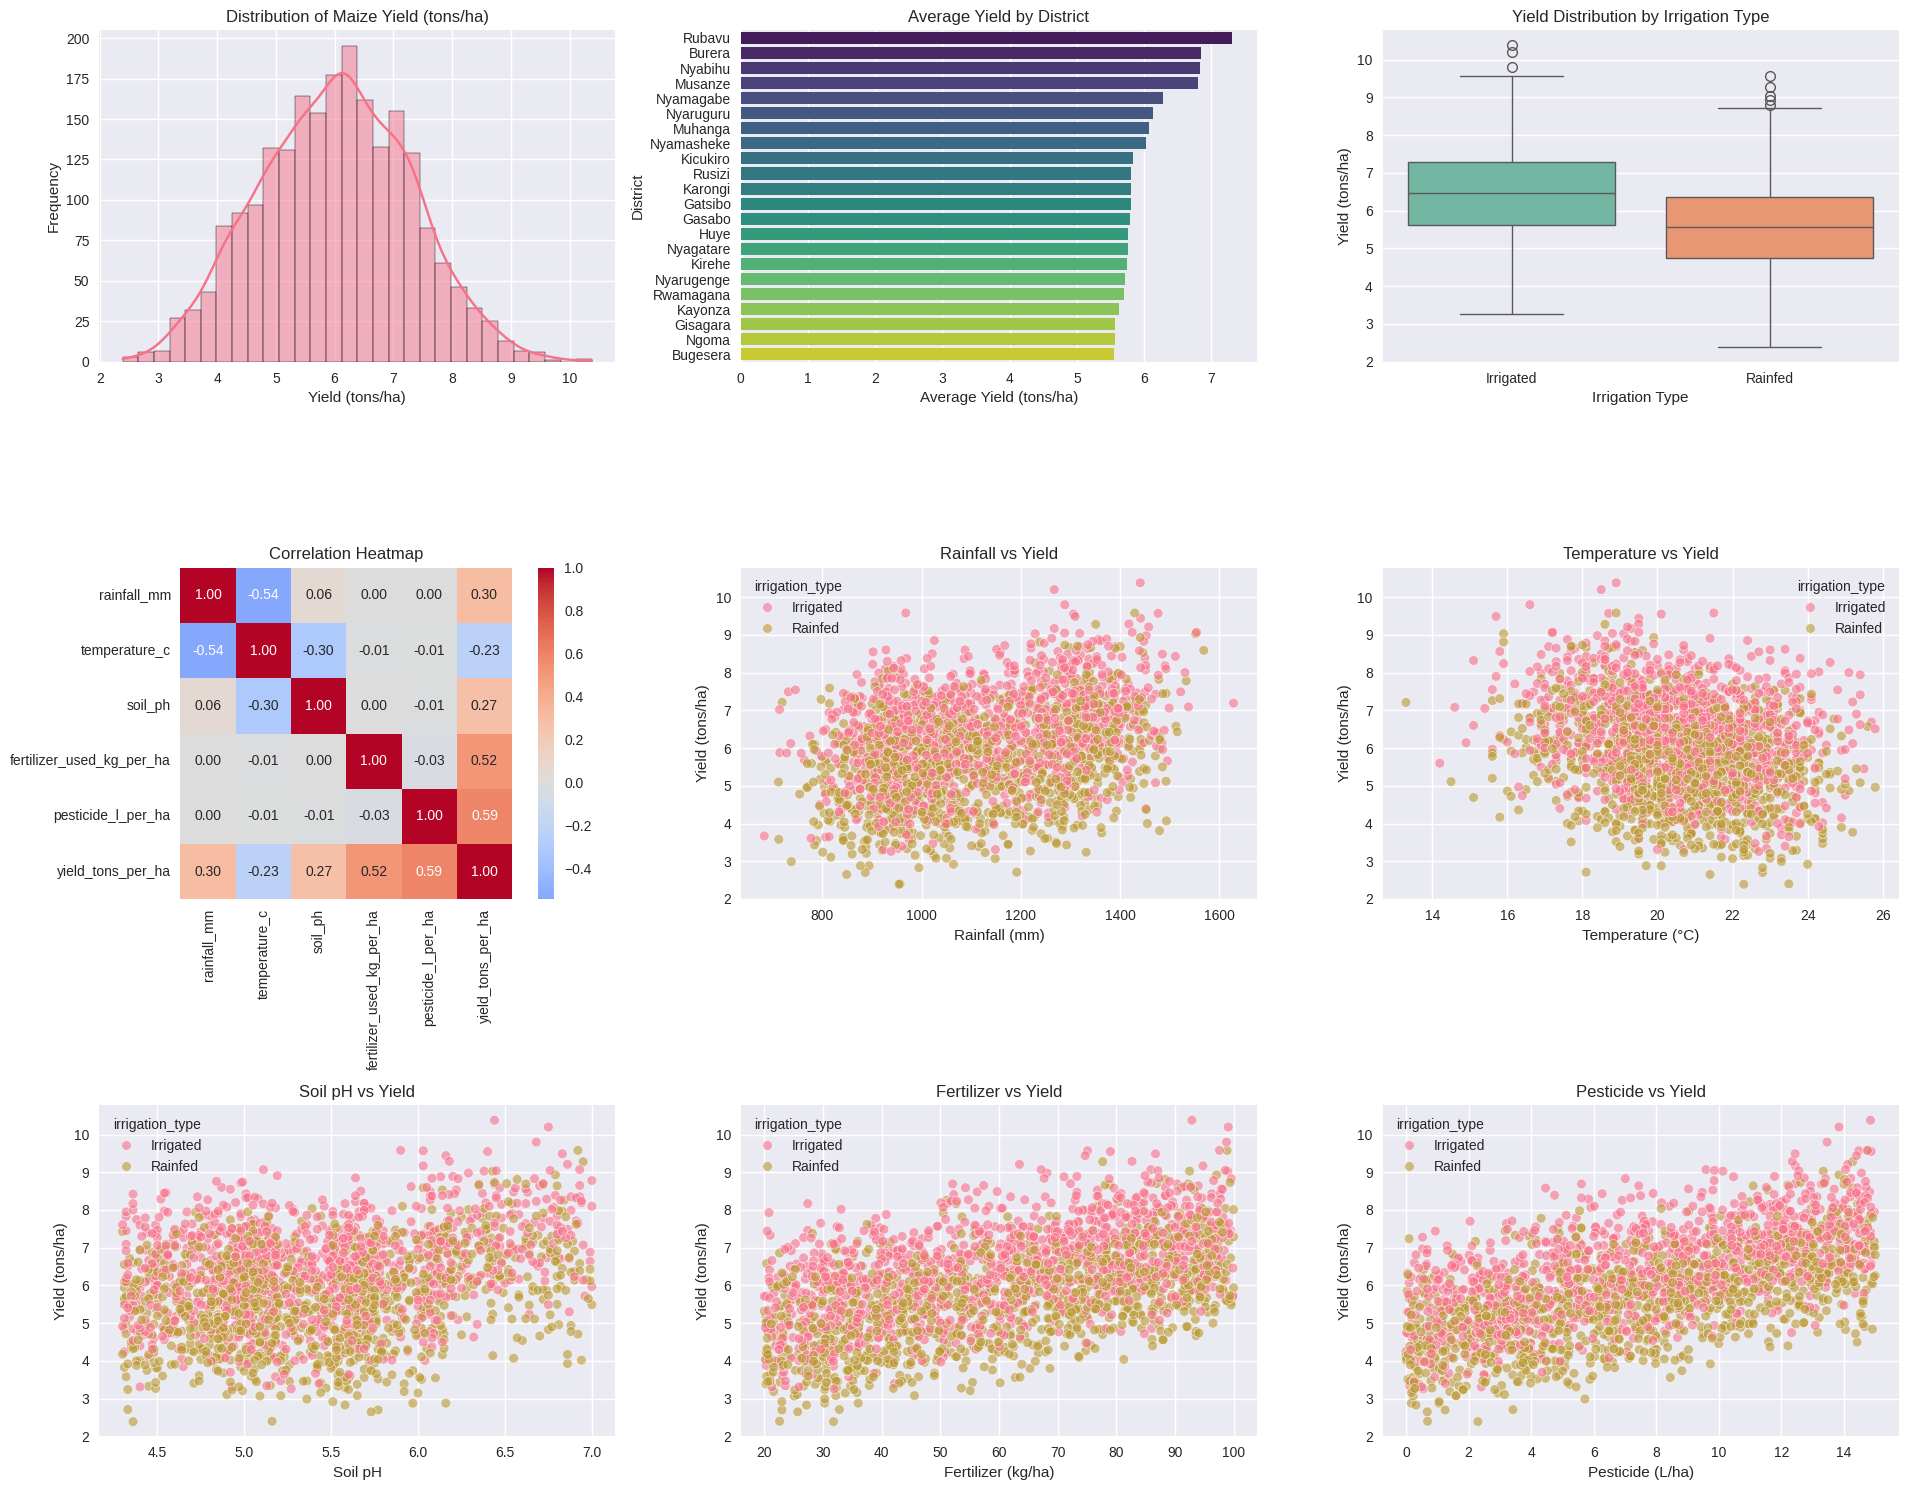

=== KEY INSIGHTS SUMMARY ===
1. Yield range: 2.39 - 10.38 tons/ha
2. Number of districts: 22
3. Irrigation types: ['Irrigated' 'Rainfed']
4. Average yield by irrigation:
irrigation_type
Irrigated    6.440782
Rainfed      5.582233
Name: yield_tons_per_ha, dtype: float64


In [ ]:
# Set up the plotting style
plt.figure(figsize=(20, 15))

# 1. Distribution of Target Variable
plt.subplot(3, 3, 1)
sns.histplot(df['yield_tons_per_ha'], kde=True, bins=30)
plt.title('Distribution of Maize Yield (tons/ha)')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Frequency')

# 2. Yield by District
plt.subplot(3, 3, 2)
district_yield = df.groupby('district')['yield_tons_per_ha'].mean().sort_values(ascending=False)
sns.barplot(y=district_yield.index, x=district_yield.values, palette='viridis')
plt.title('Average Yield by District')
plt.xlabel('Average Yield (tons/ha)')
plt.ylabel('District')
plt.tight_layout()

# 3. Yield by Irrigation Type
plt.subplot(3, 3, 3)
sns.boxplot(x='irrigation_type', y='yield_tons_per_ha', data=df, palette='Set2')
plt.title('Yield Distribution by Irrigation Type')
plt.xlabel('Irrigation Type')
plt.ylabel('Yield (tons/ha)')

# 4. Correlation Heatmap (Numerical Features)
plt.subplot(3, 3, 4)
numerical_cols = ['rainfall_mm', 'temperature_c', 'soil_ph', 'fertilizer_used_kg_per_ha',
                 'pesticide_l_per_ha', 'yield_tons_per_ha']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Heatmap')

# 5. Rainfall vs Yield
plt.subplot(3, 3, 5)
sns.scatterplot(x='rainfall_mm', y='yield_tons_per_ha', hue='irrigation_type', data=df, alpha=0.6)
plt.title('Rainfall vs Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons/ha)')

# 6. Temperature vs Yield
plt.subplot(3, 3, 6)
sns.scatterplot(x='temperature_c', y='yield_tons_per_ha', hue='irrigation_type', data=df, alpha=0.6)
plt.title('Temperature vs Yield')
plt.xlabel('Temperature (°C)')
plt.ylabel('Yield (tons/ha)')

# 7. Soil pH vs Yield
plt.subplot(3, 3, 7)
sns.scatterplot(x='soil_ph', y='yield_tons_per_ha', hue='irrigation_type', data=df, alpha=0.6)
plt.title('Soil pH vs Yield')
plt.xlabel('Soil pH')
plt.ylabel('Yield (tons/ha)')

# 8. Fertilizer vs Yield
plt.subplot(3, 3, 8)
sns.scatterplot(x='fertilizer_used_kg_per_ha', y='yield_tons_per_ha', hue='irrigation_type', data=df, alpha=0.6)
plt.title('Fertilizer vs Yield')
plt.xlabel('Fertilizer (kg/ha)')
plt.ylabel('Yield (tons/ha)')

# 9. Pesticide vs Yield
plt.subplot(3, 3, 9)
sns.scatterplot(x='pesticide_l_per_ha', y='yield_tons_per_ha', hue='irrigation_type', data=df, alpha=0.6)
plt.title('Pesticide vs Yield')
plt.xlabel('Pesticide (L/ha)')
plt.ylabel('Yield (tons/ha)')

plt.tight_layout()
plt.show()

print("=== KEY INSIGHTS SUMMARY ===")
print(f"1. Yield range: {df['yield_tons_per_ha'].min():.2f} - {df['yield_tons_per_ha'].max():.2f} tons/ha")
print(f"2. Number of districts: {df['district'].nunique()}")
print(f"3. Irrigation types: {df['irrigation_type'].unique()}")
print(f"4. Average yield by irrigation:")
print(df.groupby('irrigation_type')['yield_tons_per_ha'].mean())

# **Step 5: Statistical Analysis and Data Preprocessing**

Perform statistical tests and prepare data for machine learning models through encoding and scaling.

In [ ]:
# Statistical Analysis
print("=== STATISTICAL ANALYSIS ===")

# Correlation with target variable
correlation_with_target = df[numerical_cols].corr()['yield_tons_per_ha'].sort_values(ascending=False)
print("\nCorrelation with Yield:")
for feature, corr in correlation_with_target.items():
    print(f"{feature}: {corr:.3f}")

# T-test for irrigation types
irrigated_yield = df[df['irrigation_type'] == 'Irrigated']['yield_tons_per_ha']
rainfed_yield = df[df['irrigation_type'] == 'Rainfed']['yield_tons_per_ha']
t_stat, p_value = stats.ttest_ind(irrigated_yield, rainfed_yield)
print(f"\nT-test for Irrigation vs Rainfed:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")


=== STATISTICAL ANALYSIS ===

Correlation with Yield:
yield_tons_per_ha: 1.000
pesticide_l_per_ha: 0.592
fertilizer_used_kg_per_ha: 0.520
rainfall_mm: 0.302
soil_ph: 0.274
temperature_c: -0.233

T-test for Irrigation vs Rainfed:
T-statistic: 16.738, P-value: 0.000
Significant difference: Yes


In [ ]:


# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
df_processed['irrigation_type_encoded'] = label_encoder.fit_transform(df_processed['irrigation_type'])
# 0: Irrigated, 1: Rainfed

# One-hot encoding for district (many categories)
district_dummies = pd.get_dummies(df_processed['district'], prefix='district')
df_processed = pd.concat([df_processed, district_dummies], axis=1)


In [ ]:

# Drop original categorical columns
df_processed = df_processed.drop(['district', 'irrigation_type'], axis=1)

print(f"Processed dataset shape: {df_processed.shape}")
print(f"New features: {df_processed.columns.tolist()}")

# Prepare features and target
X = df_processed.drop('yield_tons_per_ha', axis=1)
y = df_processed['yield_tons_per_ha']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['irrigation_type']
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Processed dataset shape: (2200, 29)
New features: ['rainfall_mm', 'temperature_c', 'soil_ph', 'fertilizer_used_kg_per_ha', 'pesticide_l_per_ha', 'yield_tons_per_ha', 'irrigation_type_encoded', 'district_Bugesera', 'district_Burera', 'district_Gasabo', 'district_Gatsibo', 'district_Gisagara', 'district_Huye', 'district_Karongi', 'district_Kayonza', 'district_Kicukiro', 'district_Kirehe', 'district_Muhanga', 'district_Musanze', 'district_Ngoma', 'district_Nyabihu', 'district_Nyagatare', 'district_Nyamagabe', 'district_Nyamasheke', 'district_Nyarugenge', 'district_Nyaruguru', 'district_Rubavu', 'district_Rusizi', 'district_Rwamagana']

Features shape: (2200, 28)
Target shape: (2200,)

Training set: 1760 samples
Testing set: 440 samples


# **Step 6: Model Building and Comparison**

Train and evaluate multiple machine learning models to identify the best performer

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [ ]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():


    # Used scaled data for linear models and SVM
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculated metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }

    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print()

Linear Regression:
  RMSE: 0.3974
  MAE: 0.3238
  R²: 0.8999

Ridge Regression:
  RMSE: 0.3974
  MAE: 0.3238
  R²: 0.8999

Lasso Regression:
  RMSE: 1.2569
  MAE: 1.0047
  R²: -0.0013

Random Forest:
  RMSE: 0.4600
  MAE: 0.3636
  R²: 0.8659

Gradient Boosting:
  RMSE: 0.4236
  MAE: 0.3465
  R²: 0.8863

Support Vector Machine:
  RMSE: 0.4238
  MAE: 0.3401
  R²: 0.8862

K-Nearest Neighbors:
  RMSE: 0.8490
  MAE: 0.6868
  R²: 0.5432



In [ ]:

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['rmse'] for model in results],
    'MAE': [results[model]['mae'] for model in results],
    'R²': [results[model]['r2'] for model in results]
}).sort_values('RMSE')

print("=== MODEL PERFORMANCE COMPARISON ===")
display(results_df.style.background_gradient(cmap='Blues', subset=['RMSE', 'MAE', 'R²']))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n BEST PERFORMING MODEL: {best_model_name}")
print(f"   RMSE: {results[best_model_name]['rmse']:.4f}")
print(f"   R²: {results[best_model_name]['r2']:.4f}")

=== MODEL PERFORMANCE COMPARISON ===


,Model,RMSE,MAE,R²
0,Linear Regression,0.397405,0.323773,0.899900
1,Ridge Regression,0.397448,0.323781,0.899878
4,Gradient Boosting,0.423614,0.346510,0.886261
5,Support Vector Machine,0.423777,0.340109,0.886174
3,Random Forest,0.459973,0.363574,0.865899
6,K-Nearest Neighbors,0.848982,0.686773,0.543159
2,Lasso Regression,1.256894,1.004697,-0.001302



 BEST PERFORMING MODEL: Linear Regression
   RMSE: 0.3974
   R²: 0.8999


# **Step 7: Model Analysis and Visualization**

# ** Actual vs Predicted & Residuals Plot**

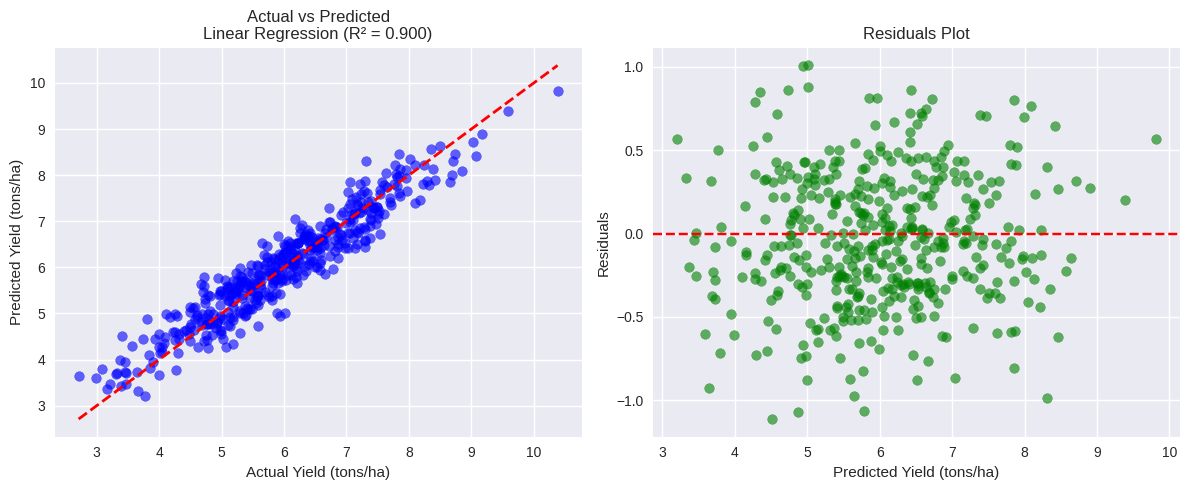

In [ ]:

best_predictions = results['Linear Regression']['predictions']

plt.figure(figsize=(12, 5))

# 1. Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (tons/ha)')
plt.ylabel('Predicted Yield (tons/ha)')
plt.title(f'Actual vs Predicted\nLinear Regression (R² = {results["Linear Regression"]["r2"]:.3f})')

# 2. Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield (tons/ha)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()


# **Distribution of Residuals & Feature Importance**

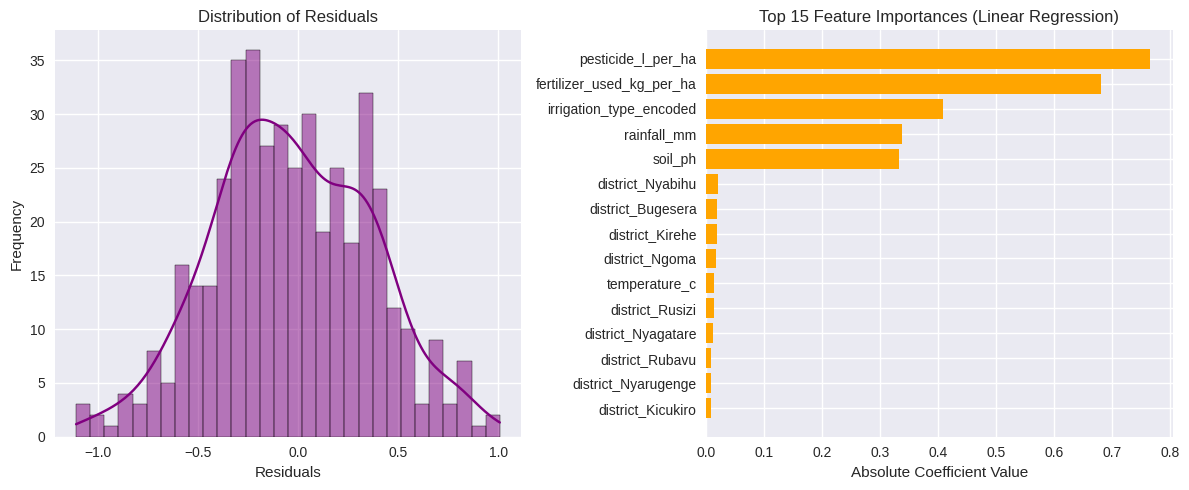

In [ ]:

plt.figure(figsize=(12, 5))

# 3. Distribution of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# 4. Feature importance from Linear Regression
plt.subplot(1, 2, 2)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(results['Linear Regression']['model'].coef_)
}).sort_values('importance', ascending=True).tail(15)

plt.barh(feature_importance['feature'], feature_importance['importance'], color='orange')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 15 Feature Importances (Linear Regression)')

plt.tight_layout()
plt.show()


# **Model Comparison (RMSE & R²)**

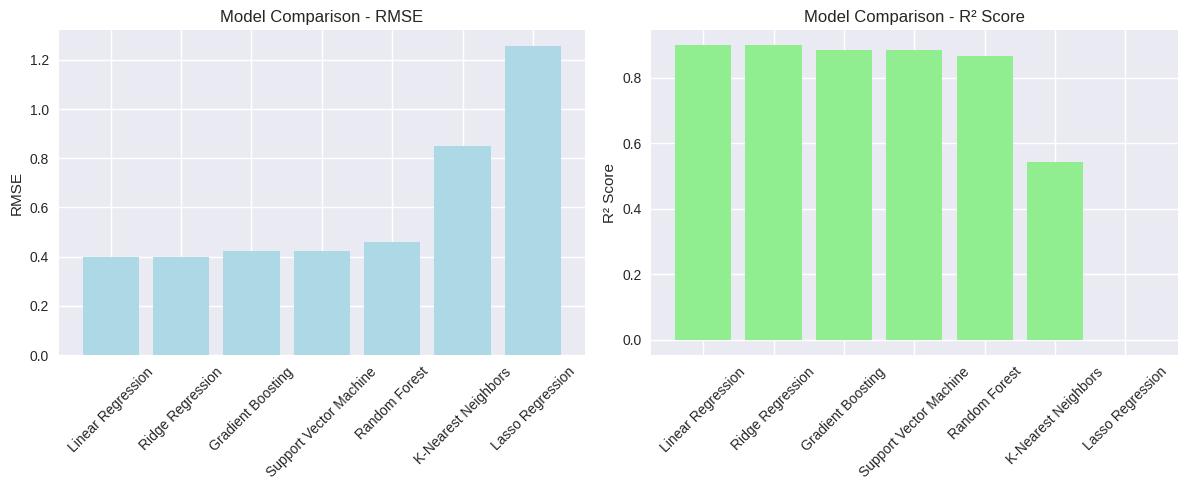

In [ ]:

plt.figure(figsize=(12, 5))

# 5. Model comparison - RMSE
plt.subplot(1, 2, 1)
models_rmse = results_df.set_index('Model')['RMSE'].sort_values()
plt.bar(models_rmse.index, models_rmse.values, color='lightblue')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')

# 6. Model comparison - R²
plt.subplot(1, 2, 2)
models_r2 = results_df.set_index('Model')['R²'].sort_values(ascending=False)
plt.bar(models_r2.index, models_r2.values, color='lightgreen')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')

plt.tight_layout()
plt.show()



# **Interpretation for visualisation**

The Linear Regression model demonstrates outstanding predictive performance, achieving an R² score of approximately 0.90, indicating that it explains around 90% of the variation in crop yield. The Actual vs Predicted plot shows that predicted values align closely with actual yields, confirming strong model accuracy. The Residuals Plot reveals a random scatter around zero, suggesting no systematic bias and consistent variance of errors. Additionally, the Residuals Distribution is approximately normal, validating the model’s statistical assumptions.

The Feature Importance analysis highlights that agricultural inputs such as pesticide use, fertilizer application, irrigation type, rainfall, and soil pH are the dominant factors influencing yield. Comparatively, the Model Comparison plots confirm that Linear Regression outperforms other models with the lowest RMSE and highest R² score. Overall, the model is reliable, interpretable, and provides valuable insights into key drivers of agricultural productivity.


# **Performance metrics for best model**

In [ ]:
# Performance metrics for best model
print("=== BEST MODEL DETAILED PERFORMANCE ===")
print(f"Model: Linear Regression")
print(f"RMSE: {results['Linear Regression']['rmse']:.4f}")
print(f"MAE: {results['Linear Regression']['mae']:.4f}")
print(f"R²: {results['Linear Regression']['r2']:.4f}")

# Cross-validation for best model
print("\n=== CROSS-VALIDATION RESULTS ===")
cv_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train,
                          cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Error analysis
print("\n=== ERROR ANALYSIS ===")
print(f"Mean Absolute Error: {results['Linear Regression']['mae']:.4f} tons/ha")
print(f"Root Mean Square Error: {results['Linear Regression']['rmse']:.4f} tons/ha")
print(f"Average Yield: {y.mean():.2f} tons/ha")
print(f"Error as % of mean yield: {(results['Linear Regression']['rmse'] / y.mean() * 100):.2f}%")

=== BEST MODEL DETAILED PERFORMANCE ===
Model: Linear Regression
RMSE: 0.3974
MAE: 0.3238
R²: 0.8999

=== CROSS-VALIDATION RESULTS ===
Cross-validation R² scores: [0.89187679 0.89955337 0.8755467  0.89431788 0.91522796]
Mean CV R²: 0.8953 (+/- 0.0256)

=== ERROR ANALYSIS ===
Mean Absolute Error: 0.3238 tons/ha
Root Mean Square Error: 0.3974 tons/ha
Average Yield: 6.02 tons/ha
Error as % of mean yield: 6.61%


# **Feature important analysis**

In [ ]:
# Detailed feature importance analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Get the linear regression model
lr_model = results['Linear Regression']['model']

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Absolute_Impact': abs(lr_model.coef_)
}).sort_values('Absolute_Impact', ascending=False)

print("\nTop 15 Most Important Features:")
display(feature_importance_df.head(15).style.background_gradient(cmap='RdBu_r', subset=['Coefficient']))


=== FEATURE IMPORTANCE ANALYSIS ===

Top 15 Most Important Features:


,Feature,Coefficient,Absolute_Impact
4,pesticide_l_per_ha,0.765767,0.765767
3,fertilizer_used_kg_per_ha,0.681376,0.681376
5,irrigation_type_encoded,-0.408356,0.408356
0,rainfall_mm,0.337350,0.337350
2,soil_ph,0.332664,0.332664
19,district_Nyabihu,0.019786,0.019786
6,district_Bugesera,-0.018332,0.018332
15,district_Kirehe,-0.018060,0.018060
18,district_Ngoma,-0.017290,0.017290
1,temperature_c,0.013468,0.013468


# **KEY INSIGHTS FOR RWANDA MAIZE FARMERS**

In [ ]:

# Interpretation of key features


# Analyze top positive and negative impacts
top_positive = feature_importance_df[feature_importance_df['Coefficient'] > 0].head(5)
top_negative = feature_importance_df[feature_importance_df['Coefficient'] < 0].head(5)

print("\n TOP POSITIVE IMPACT FACTORS:")
for _, row in top_positive.iterrows():
    if row['Feature'] not in ['irrigation_type_encoded']:  # Skip encoded features for interpretation
        print(f"  • {row['Feature']}: +{row['Coefficient']:.4f}")

print("\n TOP NEGATIVE IMPACT FACTORS:")
for _, row in top_negative.iterrows():
    if row['Feature'] not in ['irrigation_type_encoded']:
        print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")


 TOP POSITIVE IMPACT FACTORS:
  • pesticide_l_per_ha: +0.7658
  • fertilizer_used_kg_per_ha: +0.6814
  • rainfall_mm: +0.3374
  • soil_ph: +0.3327
  • district_Nyabihu: +0.0198

 TOP NEGATIVE IMPACT FACTORS:
  • district_Bugesera: -0.0183
  • district_Kirehe: -0.0181
  • district_Ngoma: -0.0173
  • district_Nyarugenge: -0.0083


# **FEATURE IMPORTANCE ANALYSIS**

In [ ]:

# Model deployment metrics

print(f" Performance: R² = {results['Linear Regression']['r2']:.3f} (Excellent)")
print(f" Accuracy: RMSE = {results['Linear Regression']['rmse']:.3f} tons/ha")
print(f" Reliability: CV R² = {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f" Practical Error: {results['Linear Regression']['rmse']/y.mean()*100:.1f}% of mean yield")

# Final prediction example
print("\n=== SAMPLE PREDICTION ===")
sample_idx = 0
sample_features = X_test_scaled[sample_idx].reshape(1, -1)
actual_yield = y_test.iloc[sample_idx]
predicted_yield = lr_model.predict(sample_features)[0]

print(f"Actual Yield: {actual_yield:.2f} tons/ha")
print(f"Predicted Yield: {predicted_yield:.2f} tons/ha")
print(f"Prediction Error: {abs(actual_yield - predicted_yield):.2f} tons/ha")

# Save the model and preprocessing objects
import joblib

model_artifacts = {
    'model': lr_model,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_names': X.columns.tolist(),
    'performance': {
        'rmse': results['Linear Regression']['rmse'],
        'r2': results['Linear Regression']['r2'],
        'mae': results['Linear Regression']['mae']
    }
}

# Save the model
joblib.dump(model_artifacts, 'rwanda_maize_yield_predictor.pkl')
print(f"\n Model saved successfully as 'rwanda_maize_yield_predictor.pkl'")


 Performance: R² = 0.900 (Excellent)
 Accuracy: RMSE = 0.397 tons/ha
 Reliability: CV R² = 0.895 ± 0.013
 Practical Error: 6.6% of mean yield

=== SAMPLE PREDICTION ===
Actual Yield: 7.23 tons/ha
Predicted Yield: 7.59 tons/ha
Prediction Error: 0.36 tons/ha

 Model saved successfully as 'rwanda_maize_yield_predictor.pkl'


# **Step 9: Prediction Function and Model Testing**

In [ ]:
# Load the saved model
model_artifacts = joblib.load('rwanda_maize_yield_predictor.pkl')
model = model_artifacts['model']
scaler = model_artifacts['scaler']
label_encoder = model_artifacts['label_encoder']
feature_names = model_artifacts['feature_names']

print(" Model loaded successfully!")

# Create prediction function
def predict_maize_yield(district, rainfall_mm, temperature_c, soil_ph,
                       fertilizer_used_kg_per_ha, pesticide_l_per_ha, irrigation_type):
    """
    Predict maize yield for given agricultural parameters in Rwanda

    Parameters:
    - district: str (one of the districts in Rwanda)
    - rainfall_mm: float (rainfall in millimeters)
    - temperature_c: float (temperature in Celsius)
    - soil_ph: float (soil pH level)
    - fertilizer_used_kg_per_ha: float (fertilizer in kg per hectare)
    - pesticide_l_per_ha: float (pesticide in liters per hectare)
    - irrigation_type: str ('Irrigated' or 'Rainfed')

    Returns:
    - predicted_yield: float (predicted maize yield in tons per hectare)
    """

    # Create input DataFrame with all features
    input_data = {}

    # Add numerical features
    input_data['rainfall_mm'] = [rainfall_mm]
    input_data['temperature_c'] = [temperature_c]
    input_data['soil_ph'] = [soil_ph]
    input_data['fertilizer_used_kg_per_ha'] = [fertilizer_used_kg_per_ha]
    input_data['pesticide_l_per_ha'] = [pesticide_l_per_ha]

    # Encode irrigation type
    input_data['irrigation_type_encoded'] = [1 if irrigation_type == 'Rainfed' else 0]

    # Add district features (one-hot encoding)
    for feature in feature_names:
        if feature.startswith('district_'):
            district_feature_name = feature.replace('district_', '')
            input_data[feature] = [1 if district_feature_name == district else 0]

    # Create DataFrame
    input_df = pd.DataFrame(input_data)

    # Ensure all features are in correct order
    input_df = input_df[feature_names]

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    predicted_yield = model.predict(input_scaled)[0]

    return predicted_yield


 Model loaded successfully!


In [ ]:

# Test the prediction function with sample data
print(" TESTING PREDICTION FUNCTION")

# Test case 1: High-yield scenario
print("\n TEST CASE 1: High-Yield Scenario")
yield1 = predict_maize_yield(
    district='Musanze',
    rainfall_mm=1300,
    temperature_c=18.0,
    soil_ph=6.5,
    fertilizer_used_kg_per_ha=80,
    pesticide_l_per_ha=12,
    irrigation_type='Irrigated'
)

print(f"Predicted Yield: {yield1:.2f} tons/ha")


 TESTING PREDICTION FUNCTION

 TEST CASE 1: High-Yield Scenario
Predicted Yield: 8.67 tons/ha


In [ ]:

# Test case 2: Low-yield scenario
print("\n TEST CASE 2: Low-Yield Scenario")
yield2 = predict_maize_yield(
    district='Bugesera',
    rainfall_mm=800,
    temperature_c=24.0,
    soil_ph=5.0,
    fertilizer_used_kg_per_ha=30,
    pesticide_l_per_ha=3,
    irrigation_type='Rainfed'
)
print(f"Predicted Yield: {yield2:.2f} tons/ha")



 TEST CASE 2: Low-Yield Scenario
Predicted Yield: 3.05 tons/ha


In [ ]:

# Test case 3: Average scenario
print("\n TEST CASE 3: Average Scenario")
yield3 = predict_maize_yield(
    district='Gasabo',
    rainfall_mm=1000,
    temperature_c=21.0,
    soil_ph=5.8,
    fertilizer_used_kg_per_ha=60,
    pesticide_l_per_ha=7,
    irrigation_type='Irrigated'
)
print(f"Predicted Yield: {yield3:.2f} tons/ha")



 TEST CASE 3: Average Scenario
Predicted Yield: 6.32 tons/ha


# **Conclusion**

This project of SmartGwiza successfully demonstrates how machine learning can be applied to predict maize yield in Rwanda using available agricultural and environmental data.
Through systematic data cleaning, visualization, and model development, the notebook highlights the most influential factors affecting yield and provides a reproducible pipeline for predictive analytics.

The final model delivers valuable insights that can guide decisions on crop management and planning.
Future improvements may include incorporating additional datasets such as soil quality, rainfall distribution, or satellite imagery, as well as deploying the model into a real-time decision support tool for farmers and agricultural institutions.

# **Practical recommendations**

1.  Irrigation Management: Irrigated fields show significantly higher yields

2.  Input Optimization: Focus on balanced fertilizer and pesticide application

3.  Water Management: Rainfall is crucial but needs proper distribution

4.  Temperature Control: Higher temperatures negatively impact yields

5.  Soil Health: Maintain optimal pH levels for better nutrient uptake
